#SPDX-FileCopyrightText: 2024 David Fernandes del Pozo <david.fernandesdelpozo@ugent.be>, <fernandesdelpozo.david@gmail.com>

#SPDX-License-Identifier: GPL-3.0

# Settling velocity

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import ode
from scipy.integrate import odeint

# Prints current Python version
print("Current version of Python is ", sys.version)
print("Current version of Scipy is ", scipy.__version__)


# Change some matplotlib settings
plt.rcParams
matplotlib.rcdefaults()
plt.rcParams['mathtext.fontset'] = "cm"

Current version of Python is  3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
Current version of Scipy is  1.11.1


In [4]:
# Model Parameters Retrieved from BSM1
v_0 = 250     # Maximum settling velocity               [m/d]
v0 = 474      # Maximum Vesilind settling velocity      [m/d]
rh = 0.000576 # Hindered zone settling parameter        [m³/(g SS)]
rp = 0.00286  # Flocculant zone settling parameter      [m³/(g SS)]
fns = 0.00228 # Non-settable fraction                   [-]

In [5]:
# Steady-State values of all particulate matter
XI5  = 1149   # [g COD/m³]
XS5  = 49.3   # [g COD/m³]
XBH5 = 2559   # [g COD/m³]
XBA5 = 150    # [g COD/m³]
XP5  = 452    # [g COD/m³]
XND5  = 3.53  # [g N/m³]

# Steady state total SLudge concentration X
X = XI5 + XS5 + XBH5 + XBA5 + XP5

# To calculate the sludge concentration from the concentrations in compartment 5 of the 
#activated sludge reactor
frCOD_SS = 4/3
Xf = 1/frCOD_SS*(XI5 + XS5 + XBH5 + XBA5 + XP5)
Xmin = fns * Xf     # =7.45 g/m³ --> ligt in de lijn met 10 g/m³ uit paper "one-dimensional"

# Xmin retrieved from paper "One-dimensional settler": Xmin = 10 g/m³
#Xmin = 500     # suspended solids concentration below which the settling velocity equals zero [g/m3] 

# Vesilind settling velocity
def vesilind(X):
    vs = v0*np.exp(-rh*(X-Xmin))
    return vs
    
# Takacs settling velocity
def takacs(X):
    vs = v0*(np.exp(-rh*(X-Xmin)) - np.exp(-rp*(X-Xmin)))
    return vs

In [21]:
# Data of Vlasschaert (2013)
data = {'V':24*np.array([4.592857142857143,3.007142857142858,1.335714285714285,0.2857142857142865,0.1357142857142861,0.1142857142857138]),
        'X':1000*np.array([1.4063604240282683,2.8056537102473493,3.3144876325088335,4.459363957597173,5.646643109540635,7.399293286219081])}
data_Vlasschaert = pd.DataFrame(data=data)
data_Vlasschaert

,V,X
0,110.228571,1406.360424
1,72.171429,2805.653710
2,32.057143,3314.487633
3,6.857143,4459.363958
4,3.257143,5646.643110
5,2.742857,7399.293286


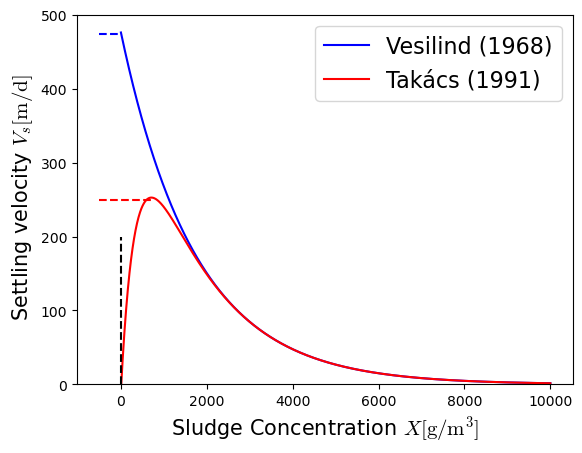

In [22]:
#create a virtual sludge concentration X range
x = np.linspace(0, 10000, 2000)

plt.figure()
plt.plot(x, vesilind(x), "b-", label = "Vesilind (1968)")
plt.plot(x, takacs(x), "r-", label = "Takács (1991)")
plt.hlines(y=474, xmin=-500, xmax=0, color='b',linestyle='--')
plt.hlines(y=250, xmin=-500, xmax=700, color='r',linestyle='--')
plt.vlines(x=Xmin, ymin=0, ymax=200, color='k', linestyle='--')
plt.legend(fontsize = 16)
plt.ylim(0,500)
plt.xlabel(r"Sludge Concentration $X \mathrm{[g/m^3]}$", fontsize = 15)
plt.ylabel(r" Settling velocity $V_{s} \mathrm{[m/d]}$", fontsize = 15)
plt.show()

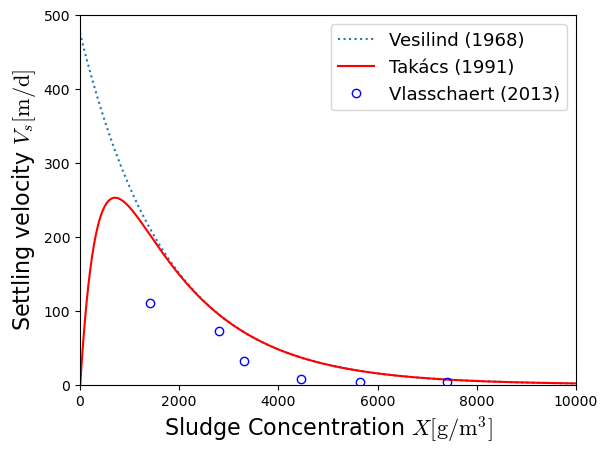

In [24]:
plt.figure()
plt.plot(x, vesilind(x), ":", label= "Vesilind (1968)")
plt.plot(x, takacs(x), "r-", label= "Takács (1991)")
plt.plot(data_Vlasschaert['X'], data_Vlasschaert['V'], "o", markerfacecolor='none', markeredgecolor='b', label= "Vlasschaert (2013)")
plt.legend(fontsize = 13)
plt.xlim(0, 10000)
plt.ylim(0, 500)
plt.xlabel(r"Sludge Concentration $X \mathrm{[g/m^3]}$", fontsize=16)
plt.ylabel(r"Settling velocity $V_{s} \mathrm{[m/d]}$", fontsize=16)
plt.show()